In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score, adjusted_rand_score,homogeneity_score, completeness_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import seaborn as sns; 
import string

In [0]:
users = pd.read_csv('Utilizator.csv', delimiter=",")
users

,cod_utilizator,email,nume,prenume
0,1,maria.pandele33@gmail.com,Pandele,Maria-Smaranda
1,2,ana-cristina.rogoz@my.fmi.unibuc.ro,Rogoz,Ana-Cristina
2,3,andreea.ionescu@gmail.com,Ionescu,Andreea
3,4,calin.popescu@gmail.com,Popescu,Calin
4,5,francesca.poll@gmail.com,Poll,Francesca
5,6,andreea.suiu@gmail.com,Suiu-Cristea,Andreea
6,7,ovidiu.sontea@gmail.com,Sontea,Ovidiu
7,8,andrei.topana@gmail.com,Topana,Andrei
8,9,sabin.olaru@gmail.com,Olaru,Sabin
9,10,robert.banu@gmail.com,Banu,Robert


In [0]:
types = pd.read_csv('Specific.csv', delimiter=",")
types

,cod_specific,nume_specific
0,1,asian
1,2,british
2,3,cafe
3,4,chinese
4,5,european
5,6,fastfood
6,7,french
7,8,greek
8,9,grill
9,10,healthy


In [0]:
restaurants = pd.read_csv('Restaurant.csv', delimiter=",")
restaurants

,adresa,cod_restaurant,nume,preturi
0,"Calea Victoriei 63 - 81 | Sector 1, inside Rad...",1,Ginger Sushi Bar,$$$
1,"Strada Putul lui Zamfir 5, Bucharest, Romania",2,YUKI,$$$
2,"Strada Smardan Nr. 23-25, Bucharest, Romania",3,St. Patrick Irish Pub & Restaurant,$$$
3,"Bulevardul Laminorului nr 107, Bucharest 01295...",4,Casa Victoria Laminorului,$$$
4,"Strada Michelet Jules 12, Bucharest 010463, Ro...",5,ORYGYNS Specialty Coffee,$$
5,"Strada Smardan 11, Bucharest 030071, Romania",6,Cafe Klein,$$
6,"66 Strada Berzei | Sector 1, Bucharest, Romania",7,Beijing Garden,$$$
7,"98, Viitorului | Sector 2, Bucharest, Romania",8,China Town,$$
8,"Stirbei Voda 59, Bucharest, Romania",9,Burgeria,$
9,"Ioan C. Bratianu, nr.34, sector 3, Bucharest 0...",10,Latin Pizza,$


In [0]:
restaurant_type = pd.read_csv('Restaurant_Specific.csv', delimiter=',')

In [0]:
restaurant_type

4 classes 
* asian
* european 
* latino 
* caffe 

In [0]:
classes = [0, 0, 1, 1, 3, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1]

### Create dataset for ML
Pe OY restaurant,  pe OX specific. 

In [0]:
features_list = types['cod_specific'].values
dataset = pd.DataFrame(0, index=np.arange(len(restaurants)), columns=features_list)

In [0]:
dataset

In [0]:
for i in range(len(restaurant_type)):
  dataset[restaurant_type['cod_specific'][i]][restaurant_type['cod_restaurant'][i] - 1] = 1

In [0]:
dataset

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
8,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [0]:
colors = ['firebrick', 'darksalmon', 'gold', 'deepskyblue']

In [0]:
pca = PCA(n_components=2)
dataset_pca = pca.fit_transform(dataset)

In [0]:
algorithms = [KMeans]
#, AgglomerativeClustering]
# algorithms = [DBSCAN]

for i, Algorithm in enumerate(algorithms):
    print(Algorithm)
    cl = Algorithm()
    cl.set_params(n_clusters=4)
    
    y_pred = cl.fit_predict(dataset_pca);
    
    ss = silhouette_score(dataset_pca, y_pred)
    print("Silhuette score:", ss)

    ar = adjusted_rand_score(classes, y_pred)
    print("Adjusted rand score:", ar)
    
    hs = homogeneity_score(classes, y_pred)
    print("Homogenity score:", hs)
    
    cs = completeness_score(classes, y_pred)
    print("Completeness score:", cs)
    
    print(classes)
    print(y_pred)

<class 'sklearn.cluster.k_means_.KMeans'>
Silhuette score: 0.5024049861217146
Adjusted rand score: 0.11071213750615168
Homogenity score: 0.2891751835634455
Completeness score: 0.23917648076108272
[0, 0, 1, 1, 3, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1]
[0 0 0 1 1 3 3 0 3 0 0 1 1 1 2 3 0 0 0 2 2 2 2 2 2 2 2]


In [0]:
dataset_pca

array([[-0.67290506, -0.57863181],
       [-0.85707514, -0.06561331],
       [-0.7102955 , -0.23072728],
       [ 1.31574939, -0.68813427],
       [ 1.39585942, -0.91980709],
       [-0.14150689, -0.82044476],
       [-0.16206703, -0.83959991],
       [-0.97001799, -0.23767272],
       [-0.40786984, -0.83873877],
       [-0.52103643,  0.05878825],
       [-0.07066299, -0.08760748],
       [ 0.82450333,  0.07934637],
       [ 1.42844292,  0.17496705],
       [ 1.24686659, -0.18899156],
       [ 0.15251299,  0.30619837],
       [-0.06300155, -0.83850004],
       [-0.95215472, -0.52382533],
       [-0.56709925, -0.13133309],
       [-0.6802088 ,  0.03623704],
       [-0.54356085,  0.6200796 ],
       [-0.31845818,  1.20970323],
       [ 0.33832222,  1.18489723],
       [-0.01628082,  0.90306489],
       [-0.01628082,  0.90306489],
       [ 0.21996523,  1.06179629],
       [ 0.37412989,  0.2257421 ],
       [ 0.37412989,  0.2257421 ]])

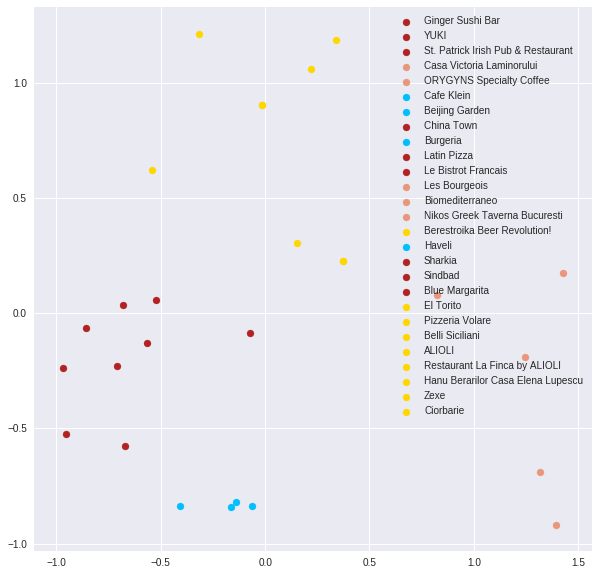

In [0]:
plt.figure(figsize=(10,10))
for i in range(0, 27):
    plt.scatter(dataset_pca[i, 0], dataset_pca[i, 1], color=colors[y_pred[i]], label=restaurants['nume'][i])
plt.legend()
plt.show()

Pentru un user vom recomanda pentru fiecare specific ce ii place: 

1) 2 restaurante din aceeasi clasa

2) 1 restaurant prezis cu aceeasi clasa, dar ce este in realitate de alt specific